# 감정사전 구축

In [1]:
from konlpy.tag import Komoran
komoran = Komoran()

In [2]:
import pandas as pd

In [3]:
tag_list = ['NNG', 'NNP', 'VV', 'VA', 'XR', 'MAG'] #데이터 확인 후 'XR', 'NNP'추가

### 긍정사전 정제

In [4]:
with open('pos_pol_word.txt', encoding='UTF-8') as f:
    lines = f.read().splitlines()

In [5]:
pos_token = [komoran.pos(token) for token in lines]

In [6]:
pos_token_list = [[token[0] for token in tokens if token[1] in tag_list] for tokens in pos_token] 

In [7]:
for i in range(len(pos_token_list)): #토큰 분리 후 tag_list 품사만 남겼을때 없어지는 단어 삭제
    j=0
    while j < len(pos_token_list):
        if len(pos_token_list[j]) == 0:
            del pos_token_list[j]
        j+=1

In [8]:
len(pos_token_list)

4767

In [9]:
pos_unique_dict = []

for t in pos_token_list:  #중복제거
    if t not in pos_unique_dict:
        pos_unique_dict.append(t)

In [28]:
pos_unique_dict #중복제거 된 사전

[['가격', '싸'],
 ['가까이', '사귀'],
 ['가까이'],
 ['가다듬'],
 ['가다듬', '수습'],
 ['가다듬', '정하'],
 ['가', '뜨', '하', '게'],
 ['가', '앉히', '바로잡'],
 ['가르치'],
 ['가르침'],
 ['가볍', '마음'],
 ['가볍', '웃'],
 ['가볍'],
 ['가볍', '보드랍'],
 ['분가'],
 ['가뿐'],
 ['가뿐', '가뿐'],
 ['가', '가뿐히'],
 ['가뿐', '느낌'],
 ['가뿐히'],
 ['가장', '중요'],
 ['가지런', '하'],
 ['가지런'],
 ['가치'],
 ['가치', '있'],
 ['각별', '나'],
 ['각별'],
 ['간직'],
 ['감각'],
 ['감당'],
 ['감동'],
 ['감모'],
 ['감싸'],
 ['감정', '북받치'],
 ['강렬'],
 ['강세'],
 ['강인'],
 ['강하'],
 ['강하', '하'],
 ['강화'],
 ['갖추'],
 ['개선'],
 ['개성'],
 ['개성', '있'],
 ['개성', '있다'],
 ['개', '소'],
 ['갸륵'],
 ['갸름'],
 ['거리낌', '없이'],
 ['거짓', '없'],
 ['거침없이'],
 ['거치', '없'],
 ['걱정', '없'],
 ['건강', '긍정'],
 ['검소'],
 ['겉면', '매끄럽'],
 ['겉모양', '아름답'],
 ['격려'],
 ['격식', '맞'],
 ['견고'],
 ['견디', '내'],
 ['견주', '없', '정도'],
 ['결점', '없'],
 ['겸손'],
 ['겸손', '이르'],
 ['경건'],
 ['경험', '많'],
 ['고상'],
 ['고상', '남자'],
 ['고상', '이야기'],
 ['고요'],
 ['고요', '하'],
 ['고치'],
 ['고치', '세우'],
 ['고치', '짓'],
 ['곧'],
 ['곧', '되'],
 ['곧', '올바르'],
 ['곧장', '나아가'],
 ['곳', '평안히'],
 ['공

In [10]:
len(pos_unique_dict)

3195

In [11]:
idx_list=[0,0,0,0,0,0,0,0,0]

In [12]:
idx_list

[0, 0, 0, 0, 0, 0, 0, 0, 0]

In [13]:
for t in pos_unique_dict:
    idx_list[len(t)] += 1

In [14]:
idx_list #1~6-gram... 3그램까지만 분석하기...

[0, 967, 2137, 75, 9, 6, 1, 0, 0]

In [15]:
pos_dict1=[]
pos_dict2=[]
pos_dict3=[]

In [16]:
for t in pos_unique_dict: #단어 갯수별로 사전 나누기
    if len(t) == 1:
        pos_dict1.append(t[0])
    elif len(t) == 2:
        pos_dict2.append(t)
    elif len(t) == 3:
        pos_dict3.append(t)

In [17]:
# LR 결과 (긍/부정어) 감성 사전에 추가
pos_add = ['편안', '스며들', '들어가', '가득', '쉽', '착하', '가볍', '적당히', '가라앉', '추천', '감사', '돌아오', '오래', '좋아하', '유지', '채우', '편하', '자주', '부드럽', '듬뿍', '진정', '굿', '순', '통째', '잘', '정착', '짱', '강추', '최고', '꾸준히', '순하', '만족', '딱']

for word in pos_add: 
    pos_dict1.append(word)

In [101]:
pos_dict1

['가까이',
 '가다듬',
 '가르치',
 '가르침',
 '가볍',
 '분가',
 '가뿐',
 '가뿐히',
 '가지런',
 '가치',
 '각별',
 '간직',
 '감각',
 '감당',
 '감동',
 '감모',
 '감싸',
 '강렬',
 '강세',
 '강인',
 '강하',
 '강화',
 '갖추',
 '개선',
 '개성',
 '갸륵',
 '갸름',
 '거침없이',
 '검소',
 '격려',
 '견고',
 '겸손',
 '경건',
 '고상',
 '고요',
 '고치',
 '곧',
 '공로',
 '공손',
 '공정',
 '공평',
 '관광',
 '관능',
 '관심',
 '괜찮',
 '괴롭',
 '교묘',
 '교양',
 '교육',
 '교화',
 '교훈',
 '구성지',
 '구원',
 '구제',
 '구차',
 '굳',
 '굴복',
 '굽히',
 '궐기',
 '그러',
 '그럴듯하',
 '그럴싸',
 '그립',
 '그리움',
 '그리워하',
 '그윽',
 '극락',
 '극복',
 '긍정',
 '기대',
 '기리',
 '기막히',
 '기부',
 '기풍',
 '길미',
 '까다롭',
 '깜찍',
 '깨끗이',
 '깨끗',
 '깨닫',
 '깨달음',
 '깨우치',
 '꼼꼼',
 '꾸미',
 '꾸준',
 '꿋꿋',
 '끈기',
 '끌',
 '끌리',
 '나쁘',
 '나아가',
 '나아지',
 '날뛰',
 '날씬',
 '남달리',
 '낫',
 '낭만',
 '너그럽',
 '넉넉',
 '넘',
 '짓',
 '노력',
 '노련',
 '논리',
 '놀',
 '놀랍',
 '높',
 '높이',
 '부드럽',
 '뉘우치',
 '늘씬',
 '능력',
 '다독거리',
 '다양',
 '다채',
 '다행',
 '단단',
 '단련',
 '달',
 '달달',
 '달뜨',
 '달래',
 '달성',
 '달콤',
 '당당',
 '대견',
 '대담',
 '대상',
 '대접',
 '대하',
 '더없이',
 '더하',
 '도리',
 '도와주',
 '도움',
 '독보',
 '독특',
 '돋',
 '돋보이',
 '돋우',

### 부정사전 정제

In [18]:
with open('neg_pol_word.txt', encoding='UTF-8') as f:
    lines = f.read().splitlines()

In [19]:
neg_token = [komoran.pos(token) for token in lines]

In [20]:
neg_token_list = [[token[0] for token in tokens if token[1] in tag_list] for tokens in neg_token] 

In [21]:
for i in range(len(neg_token_list)): #토큰 분리 후 tag_list 품사만 남겼을때 없어지는 단어 삭제
    j=0
    while j < len(neg_token_list):
        if len(neg_token_list[j]) == 0:
            del neg_token_list[j]
        j+=1

In [22]:
len(neg_token_list)

9583

In [23]:
neg_unique_dict = []

for t in neg_token_list:  #중복제거
    if t not in neg_unique_dict:
        neg_unique_dict.append(t)

In [24]:
len(neg_unique_dict)

6052

In [25]:
idx_list2=[0,0,0,0,0,0,0,0,0]

In [26]:
for t in neg_unique_dict:
    idx_list2[len(t)] += 1

In [27]:
idx_list2

[0, 1892, 3798, 302, 45, 14, 1, 0, 0]

In [28]:
neg_dict1=[]
neg_dict2=[]
neg_dict3=[]

In [29]:
for t in neg_unique_dict: #단어 갯수별로 사전 나누기
    if len(t) == 1:
        neg_dict1.append(t[0])
    elif len(t) == 2:
        neg_dict2.append(t)
    elif len(t) == 3:
        neg_dict3.append(t)

In [30]:
neg_add = ['모르', '안', '아쉽', '별로', '그냥', '하', '따갑', '광고', '딱히', '나쁘', '올라오', '기름', '부족', '못', '겉돌', '아직', '심하', '밀리', '열', '유분', '뒤집', '떨어지', '불편', '비싸', '단점', '잘못', '어렵', '땡기', '싫']

for word in neg_add:
    neg_dict1.append(word)

# 성능평가

### test data set 불러오기

In [31]:
from ast import literal_eval

In [32]:
test_sent = pd.read_csv('total_test_tokens.csv')

In [33]:
test_sent

,sen,pos_neg
0,"[('프로폴리스', 'NNP'), ('문', 'NNP'), ('나이트', 'NNP'...",1.0
1,"[('수분', 'NNP'), ('에', 'JKB'), ('유분', 'NNP'), (...",1.0
2,"[('좋', 'VA'), ('았', 'EP'), ('던', 'ETM'), ('점',...",1.0
3,"[('가격', 'NNG'), ('가격', 'NNG'), ('면', 'NNG'), (...",1.0
4,"[('세일', 'NNP'), ('도', 'JX'), ('자주', 'MAG'), ('...",1.0
...,...,...
295,"[('다만', 'MAJ'), ('도포', 'NNP'), ('후', 'NNG'), (...",0.0
296,"[('처음', 'NNG'), ('에', 'JKB'), ('샘플', 'NNG'), (...",0.0
297,"[('한', 'MM'), ('번', 'NNB'), ('바르', 'VV'), ('아서...",0.0
298,"[('속', 'NNG'), ('이', 'JKS'), ('너무', 'MAG'), ('...",0.0


In [34]:
test_sent['sen'] = test_sent['sen'].apply(literal_eval)

In [35]:
test_token_list = [[token[0] for token in tokens if token[1] in tag_list] for tokens in test_sent['sen']] 

In [36]:
test_sent['sen2'] = test_token_list

In [37]:
test_label = test_sent['pos_neg'].values.tolist()

In [38]:
test_sent['senti_score'] = 0
test_sent['pred'] = 0

### 한개의 형태소로 분리된 단어만 감성분석에 이용 
비교용

In [115]:
#1개단어만 진행
for i in range(len(test_sent)):
    for word in test_sent.loc[i, 'sen2']:
        if word in pos_dict1:
            test_sent.loc[i, 'senti_score'] += 1
        elif word in neg_dict1:
            test_sent.loc[i, 'senti_score'] -= 1

In [117]:
for i in range(len(test_sent)):
    if test_sent.loc[i, 'senti_score'] > 0:
        test_sent.loc[i, 'pred'] = 1

In [119]:
print(len(test_sent[test_sent['pred']==1]))
print(len(test_sent[test_sent['pred']==0]))

115
185


In [120]:
from sklearn.metrics import confusion_matrix

y_true = test_sent['pos_neg'].values.tolist()
y_pred = test_sent['pred'].values.tolist()

cm = confusion_matrix(y_true, y_pred)
cm

array([[123,  27],
       [ 62,  88]], dtype=int64)

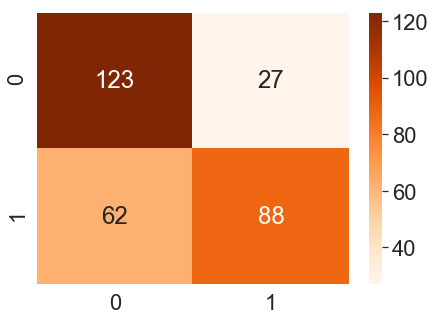

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=2)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, cmap='Oranges', fmt='g')

---------------------

### 여러개 형태소로 분리된 단어까지 이용

In [39]:
test_sent['senti_score'] = 0
test_sent['pred'] = 0

In [40]:
#3-gram
for i in range(len(test_sent)):
    for j in range(len(test_sent.loc[i, 'sen2'])-2):
        trigram = [test_sent.loc[i, 'sen2'][j],test_sent.loc[i, 'sen2'][j+1],test_sent.loc[i, 'sen2'][j+2]]
        if trigram in pos_dict3:
            test_sent.loc[i, 'senti_score'] += 1
        elif trigram in neg_dict3:
            test_sent.loc[i, 'senti_score'] -= 1

In [41]:
#2-gram
for i in range(len(test_sent)):
    for j in range(len(test_sent.loc[i, 'sen2'])-1):
        bigram = [test_sent.loc[i, 'sen2'][j],test_sent.loc[i, 'sen2'][j+1]]
        if bigram in pos_dict2:
            test_sent.loc[i, 'senti_score'] += 1
            test_sent.loc[i, 'sen2'][j] = ''
            test_sent.loc[i, 'sen2'][j+1] = ''
        elif bigram in neg_dict2:
            test_sent.loc[i, 'senti_score'] -= 1
            test_sent.loc[i, 'sen2'][j] = ''
            test_sent.loc[i, 'sen2'][j+1] = ''

In [42]:
#한단어
for i in range(len(test_sent)):
    for word in test_sent.loc[i, 'sen2']:
        if word in pos_dict1:
            test_sent.loc[i, 'senti_score'] += 1
        elif word in neg_dict1:
            test_sent.loc[i, 'senti_score'] -= 1

In [43]:
for i in range(len(test_sent)):
    if test_sent.loc[i, 'senti_score'] > 0:
        test_sent.loc[i, 'pred'] = 1

In [44]:
print(len(test_sent[test_sent['pred']==1]))
print(len(test_sent[test_sent['pred']==0]))

117
183


In [45]:
from sklearn.metrics import confusion_matrix

y_true = test_sent['pos_neg'].values.tolist()
y_pred = test_sent['pred'].values.tolist()

cm = confusion_matrix(y_true, y_pred)
cm

array([[123,  27],
       [ 60,  90]], dtype=int64)

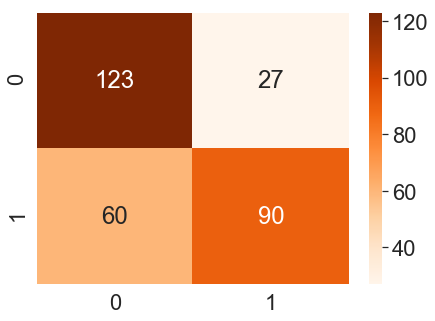

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=2)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, cmap='Oranges', fmt='g')

In [47]:
test_sent

,sen,pos_neg,sen2,senti_score,pred
0,"[(프로폴리스, NNP), (문, NNP), (나이트, NNP), (수면, NNP)...",1.0,"[프로폴리스, 문, 나이트, 수면, 팩, 닥터, 딩, 크림, 수면, 팩, 조합, 완...",2,1
1,"[(수분, NNP), (에, JKB), (유분, NNP), (느낌, NNG), (그...",1.0,"[수분, 유분, 느낌, 건조, 피부, 만들, 크림]",-2,0
2,"[(좋, VA), (았, EP), (던, ETM), (점, NNB), (수분, NN...",1.0,"[좋, 수분, 너무, 가볍, 제품, 스킨, 이후, 겹, 바르, 촉촉]",1,1
3,"[(가격, NNG), (가격, NNG), (면, NNG), (에서, JKB), (도...",1.0,"[가격, 가격, 면, 만족]",1,1
4,"[(세일, NNP), (도, JX), (자주, MAG), (하, VV), (고, E...",1.0,"[세일, , , 증정, 하, 좋]",4,1
...,...,...,...,...,...
295,"[(다만, MAJ), (도포, NNP), (후, NNG), (시간, NNG), (이...",0.0,"[도포, 후, 시간, 서서히, 지나, 얼굴, 좀, 건조, 느낌, 들, 같]",-4,0
296,"[(처음, NNG), (에, JKB), (샘플, NNG), (로, JKB), (쓰,...",0.0,"[처음, 샘플, 쓰, 좋아서, 사, 트러블, 나, 같, 사용, 중단]",-1,0
297,"[(한, MM), (번, NNB), (바르, VV), (아서, EC), (는, JX...",0.0,"[바르, 속건조, 채우]",2,1
298,"[(속, NNG), (이, JKS), (너무, MAG), (건조, NNG), (하,...",0.0,"[속, 너무, 건조]",-2,0


### 파일저장

In [48]:
test_sent.to_csv('senti_labeled_df.csv',index = False, columns = ['sen','pos_neg','sen2','senti_score','pred'])

In [50]:
t=test_sent.loc[test_sent['senti_score']!=0]

In [51]:
t=t.reset_index(drop=True)

In [52]:
y_true = t['pos_neg'].values.tolist()
y_pred = t['pred'].values.tolist()

cm = confusion_matrix(y_true, y_pred)
cm

array([[92, 27],
       [30, 90]], dtype=int64)